<a href="https://colab.research.google.com/github/JHyunjun/AnomalyDetection/blob/main/240825_kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# # TensorFlow 버전 출력
# print("TensorFlow 버전:", tf.__version__)

# # 사용 가능한 GPU 목록 확인
# gpus = tf.config.list_physical_devices('GPU')
# print("사용 가능한 GPU:", gpus)

# if gpus:
#     # GPU가 감지되면 간단한 연산 수행
#     with tf.device('/GPU:0'):
#         a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
#         b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
#         c = tf.matmul(a, b)
#         print("GPU에서 수행된 행렬 곱셈 결과:")
#         print(c)
# else:
#     print("GPU를 찾을 수 없습니다. CPU에서 실행됩니다.")

# # 현재 사용 중인 장치 확인
# print("현재 사용 중인 장치:", tf.test.gpu_device_name())

# # GPU 사용 가능 여부 확인
# print("GPU 사용 가능:", tf.test.is_built_with_cuda())

In [ ]:
# # 데이터 로드
# TRAIN_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/train/train.csv")
# TEST_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/test/test.csv")

# # TIME INDEX 열 추가 (0부터 시작하는 인덱스)
# TRAIN_DF_RAW['TIME_INDEX'] = range(len(TRAIN_DF_RAW))
# TEST_DF_RAW['TIME_INDEX'] = range(len(TRAIN_DF_RAW), len(TRAIN_DF_RAW) + len(TEST_DF_RAW))

# # 'Timestamp'와 'anomaly'를 제외한 특성 선택
# features = TRAIN_DF_RAW.columns.drop(['Timestamp', 'anomaly', 'TIME_INDEX'])

# # 그래프 그리기
# fig, axes = plt.subplots(len(features), 1, figsize=(20, 7*len(features)), sharex=True)
# fig.suptitle('Features Over Time Index (Train and Test)', fontsize=20)

# for i, feature in enumerate(features):
#     # Train 데이터 플롯
#     axes[i].scatter(TRAIN_DF_RAW['TIME_INDEX'], TRAIN_DF_RAW[feature],
#                     alpha=0.5, s=1, color='blue', label='Train')

#     # Test 데이터 플롯
#     axes[i].scatter(TEST_DF_RAW['TIME_INDEX'], TEST_DF_RAW[feature],
#                     alpha=0.5, s=1, color='red', label='Test')

#     axes[i].set_ylabel(feature, fontsize=12)
#     axes[i].grid(True)
#     axes[i].legend()

#     # Train과 Test 데이터 사이에 구분선 추가
#     axes[i].axvline(x=len(TRAIN_DF_RAW), color='green', linestyle='--', label='Train/Test Split')

# # x축 레이블 설정
# plt.xlabel('TIME INDEX', fontsize=14)

# plt.tight_layout()
# plt.show()

# # 통계 정보 출력
# train_anomaly_count = TRAIN_DF_RAW['anomaly'].sum()
# train_total_count = len(TRAIN_DF_RAW)
# test_total_count = len(TEST_DF_RAW)

# print(f"Train data points: {train_total_count}")
# print(f"Test data points: {test_total_count}")
# print(f"Number of anomalies in Train: {train_anomaly_count}")
# print(f"Anomaly ratio in Train: {train_anomaly_count/train_total_count*100:.2f}%")

In [ ]:
import pandas as pd

def select_features(df, selected_features, include_anomaly=True):
    # 'Timestamp', 'TIME_STEP'과 선택된 features는 항상 유지
    columns_to_keep = ['Timestamp', 'TIME_STEP'] + selected_features

    # 'anomaly' 열이 있고, include_anomaly가 True인 경우에만 'anomaly' 열 추가
    if 'anomaly' in df.columns and include_anomaly:
        columns_to_keep.append('anomaly')

    return df[columns_to_keep]

# 데이터 로드
TRAIN_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/train/train.csv")
TEST_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/test/test.csv")

# TIME_STEP 열 추가 (0부터 시작하는 인덱스)
TRAIN_DF_RAW['TIME_STEP'] = range(len(TRAIN_DF_RAW))
TEST_DF_RAW['TIME_STEP'] = range(len(TEST_DF_RAW))

# 사용자가 선택한 features
selected_features = ['A_1', 'A_2', 'A_3', 'A_4', 'A_5', 'B_8', 'C_1', 'C_9', 'C_10',
                     'D_1', 'D_2', 'D_3', 'D_5', 'D_6', 'D_7', 'D_8', 'D_9', 'D_10',
                     'E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6', 'E_7', 'E_8', 'E_9']  # 이 부분을 원하는 feature로 변경하세요

# 선택된 features만 유지
TRAIN_DF_SELECTED = select_features(TRAIN_DF_RAW, selected_features, include_anomaly=True)
TEST_DF_SELECTED = select_features(TEST_DF_RAW, selected_features, include_anomaly=False)

print("선택된 features로 구성된 TRAIN_DF_SELECTED의 처음 5개 행:")
print(TRAIN_DF_SELECTED.head())

print("\n선택된 features로 구성된 TEST_DF_SELECTED의 처음 5개 행:")
print(TEST_DF_SELECTED.head())

선택된 features로 구성된 TRAIN_DF_SELECTED의 처음 5개 행:
             Timestamp  TIME_STEP       A_1       A_2       A_3       A_4  \
0  2024-07-01 10:00:00          0 -1.810928  1.069678 -0.517617 -1.283807   
1  2024-07-01 10:00:01          1 -1.816159  1.073117 -0.517974 -1.256040   
2  2024-07-01 10:00:02          2 -1.822770  1.076941 -0.518099 -1.217700   
3  2024-07-01 10:00:03          3 -1.827798  1.080792 -0.518805 -1.195023   
4  2024-07-01 10:00:04          4 -1.829735  1.082612 -0.519295 -1.188628   

        A_5       B_8       C_1       C_9  ...        E_1       E_2       E_3  \
0  1.804893  0.189829 -0.477007 -0.087398  ...  30.823596  5.687100 -5.132928   
1  1.804133  0.189379 -0.477619 -0.087718  ...  30.821052  5.687915 -5.130394   
2  1.801263  0.189164 -0.474152 -0.091669  ...  30.821052  5.687915 -5.130394   
3  1.802722  0.189035 -0.474117 -0.091613  ...  30.821052  5.687915 -5.130394   
4  1.804593  0.189522 -0.474091 -0.091571  ...  30.821052  5.687915 -5.130394   

    

In [ ]:
########################FEATURE SELECTION
# COLUMNS_IN_TRAIN_DATASET = TRAIN_DF_SELECTED.columns.drop(["TIME_STEP","Timestamp", 'anomaly'])

# # 정규화 과정
# TRN_MIN = TRAIN_DF_SELECTED[COLUMNS_IN_TRAIN_DATASET].min()
# TRN_MAX = TRAIN_DF_SELECTED[COLUMNS_IN_TRAIN_DATASET].max()

# def normalize(df):
#     ndf = df.copy()
#     for c in df.columns:
#         if TRN_MAX[c] != TRN_MIN[c]:
#             ndf[c] = (df[c] - TRN_MIN[c]) / (TRN_MAX[c] - TRN_MIN[c])
#     return ndf

# TRAIN_DF = normalize(TRAIN_DF_RAW[COLUMNS_IN_TRAIN_DATASET])
# TEST_DF = normalize(TEST_DF_RAW[COLUMNS_IN_TRAIN_DATASET])

# print("TRAIN_DF.shape : ", TRAIN_DF.shape)
# print("TEST_DF.shape : ", TEST_DF.shape )

# print("선택된 features로 구성된 TRAIN_DF_SELECTED의 처음 5개 행:")
# print(TRAIN_DF.head())

# print("\n선택된 features로 구성된 TEST_DF_SELECTED의 처음 5개 행:")
# print(TEST_DF.head())



####################### ALL FEATURE
TRAIN_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/train/train.csv")
TEST_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/test/test.csv")
COLUMNS_IN_TRAIN_DATASET = TRAIN_DF_RAW.columns.drop(["Timestamp", 'anomaly'])
# TIME_STEP 열 추가 (0부터 시작하는 인덱스)
TRAIN_DF_RAW['TIME_STEP'] = range(len(TRAIN_DF_RAW))

# 정규화 과정
TRN_MIN = TRAIN_DF_RAW[COLUMNS_IN_TRAIN_DATASET].min()
TRN_MAX = TRAIN_DF_RAW[COLUMNS_IN_TRAIN_DATASET].max()

def normalize(df):
    ndf = df.copy()
    for c in df.columns:
        if TRN_MAX[c] != TRN_MIN[c]:
            ndf[c] = (df[c] - TRN_MIN[c]) / (TRN_MAX[c] - TRN_MIN[c])
    return ndf

TRAIN_DF = normalize(TRAIN_DF_RAW[COLUMNS_IN_TRAIN_DATASET])
TEST_DF = normalize(TEST_DF_RAW[COLUMNS_IN_TRAIN_DATASET])

print("TRAIN_DF.shape : ", TRAIN_DF.shape)
print("TEST_DF.shape : ", TEST_DF.shape )

TRAIN_DF.shape :  (496800, 51)
TEST_DF.shape :  (450000, 51)


In [ ]:
def create_windows(data, window_size):
    windows = []
    for i in range(len(data) - window_size + 1):
        windows.append(data[i:i+window_size])
    return np.array(windows)

# TRAIN_DF를 윈도우로 나누기
window_size = 12
train_windows = create_windows(TRAIN_DF.values, window_size)

print("Original TRAIN_DF shape:", TRAIN_DF.shape)
print("After windowing, train_windows shape:", train_windows.shape)

# TEST_DF도 같은 방식으로 윈도우로 나누기
test_windows = create_windows(TEST_DF.values, window_size)

print("\nOriginal TEST_DF shape:", TEST_DF.shape)
print("After windowing, test_windows shape:", test_windows.shape)

Original TRAIN_DF shape: (496800, 51)
After windowing, train_windows shape: (496789, 12, 51)

Original TEST_DF shape: (450000, 51)
After windowing, test_windows shape: (449989, 12, 51)


Training on fold 1/5
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 12, 51)]     0           []                               
                                                                                                  
 sequential (Sequential)        (None, 12, 51)       13787       ['input_4[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 12, 51)       23955       ['input_4[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 12, 51)       18675       ['input_4[0][0]']                
                                                                         

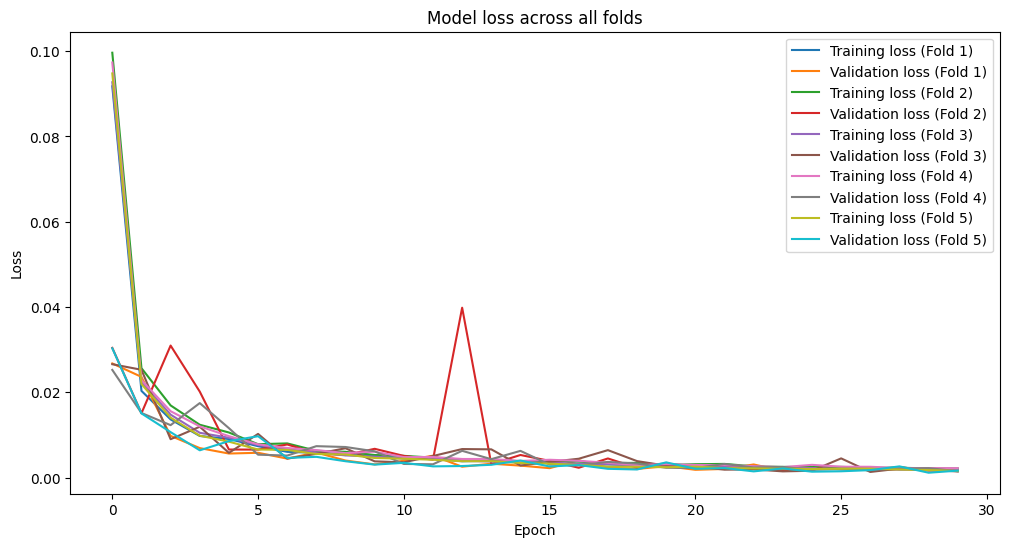

In [ ]:
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 데이터 준비 (이 부분은 그대로 유지)
train_windows = create_windows(TRAIN_DF.values, window_size)
test_windows = create_windows(TEST_DF.values, window_size)

# 데이터 정규화
scaler = StandardScaler()
train_windows_flat = train_windows.reshape(-1, train_windows.shape[-1])
train_windows_scaled = scaler.fit_transform(train_windows_flat).reshape(train_windows.shape)
test_windows_scaled = scaler.transform(test_windows.reshape(-1, test_windows.shape[-1])).reshape(test_windows.shape)

# 앙상블 모델 생성 함수 (이전과 동일)
def create_ensemble_model(input_shape):
    # (이전 코드와 동일)

# K-fold 교차 검증 설정
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=7)

# 각 폴드의 결과를 저장할 리스트
fold_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(train_windows_scaled)):
    print(f"Training on fold {fold+1}/{n_splits}")

    # 현재 폴드의 학습 및 검증 데이터 준비
    train_data = train_windows_scaled[train_index]
    val_data = train_windows_scaled[val_index]

    # 모델 생성 및 컴파일
    model = create_ensemble_model(train_data.shape[1:])
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')

    # 콜백 설정
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, min_lr=1e-5)
    ]

    # 모델 학습
    history = model.fit(
        train_data, train_data,
        epochs=30,
        batch_size=64,
        validation_data=(val_data, val_data),
        shuffle=True,
        callbacks=callbacks
    )

    # 검증 세트에 대한 최종 손실 저장
    val_loss = history.history['val_loss'][-1]
    fold_scores.append(val_loss)

    # 메모리 해제
    del model
    import gc
    gc.collect()

# K-fold 결과 분석
mean_score = np.mean(fold_scores)
std_score = np.std(fold_scores)

print(f"K-fold cross-validation results:")
print(f"Mean validation loss: {mean_score:.4f} (+/- {std_score:.4f})")

# 전체 훈련 데이터로 최종 모델 학습
final_model = create_ensemble_model(train_windows_scaled.shape[1:])
final_model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')

final_history = final_model.fit(
    train_windows_scaled, train_windows_scaled,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    shuffle=True,
    callbacks=callbacks
)

# # 최종 모델 저장
# final_model.save('final_ensemble_model.h5')

# # 학습 곡선 시각화
# plt.figure(figsize=(12, 6))
# plt.plot(final_history.history['loss'], label='Training loss')
# plt.plot(final_history.history['val_loss'], label='Validation loss')
# plt.title('Final Model Training History')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()

# # 테스트 데이터에 대한 예측
# test_predictions = final_model.predict(test_windows_scaled)

# # 예측 결과 역정규화
# test_predictions_flat = test_predictions.reshape(-1, test_predictions.shape[-1])
# test_predictions_original = scaler.inverse_transform(test_predictions_flat)

# print("Final model training completed and saved. Test predictions generated.")

# # 여기에서 test_predictions_original을 사용하여 필요한 후처리 또는 평가를 수행할 수 있습니다.

In [ ]:
# 모델 저장
model.save('C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_AD_2408/modelsave/240825/ensemble_AE_240825_kfold5.h5')
print("모델이 'ensemble_autoencoder_model.h5' 파일로 저장되었습니다.")

NameError: name 'model' is not defined

In [ ]:
with tf.device('/CPU:0'):
    train_pred = model.predict(train_windows_scaled, batch_size=64)
    test_pred = model.predict(test_windows_scaled, batch_size=64)

train_mse = np.mean(np.square(train_windows_scaled - train_pred), axis=(1,2))
test_mse = np.mean(np.square(test_windows_scaled - test_pred), axis=(1,2))

# Train 데이터 플로팅
plt.figure(figsize=(15, 6))
plt.plot(TRAIN_DF.index[window_size-1:], train_mse)
plt.title('Train Data: Reconstruction Error over Time')
plt.xlabel('Time')
plt.ylabel('Reconstruction Error')
mean_train = np.mean(train_mse)
plt.ylim(0,100)
plt.show()

# Test 데이터 플로팅
plt.figure(figsize=(15, 6))
plt.plot(TEST_DF.index[window_size-1:], test_mse)
plt.title('Test Data: Reconstruction Error over Time')
plt.xlabel('Time')
plt.ylabel('Reconstruction Error')
mean_test = np.mean(test_mse)
plt.ylim(0,100)
plt.show()

print("플로팅이 완료되었습니다. 그래프를 확인해주세요.")
print(f"Train 데이터 Reconstruction Error - 평균: {mean_train:.4f}, 최소값: {np.min(train_mse):.4f}, 최대값: {np.max(train_mse):.4f}")
print(f"Test 데이터 Reconstruction Error - 평균: {mean_test:.4f}, 최소값: {np.min(test_mse):.4f}, 최대값: {np.max(test_mse):.4f}")

NameError: name 'model' is not defined

7031/7031 [==============================] - 147s 21ms/step


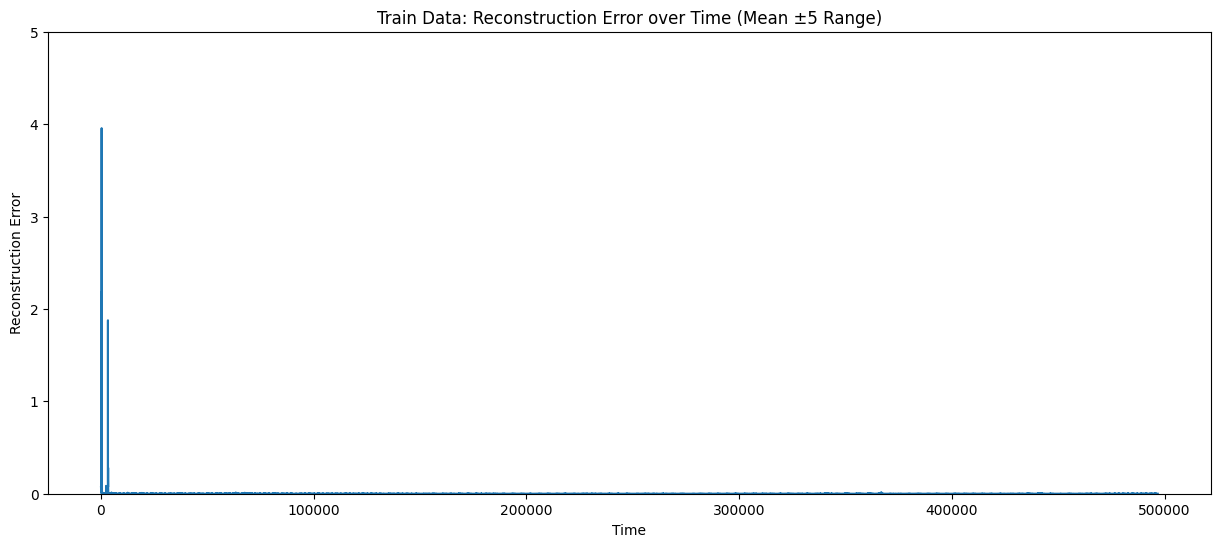

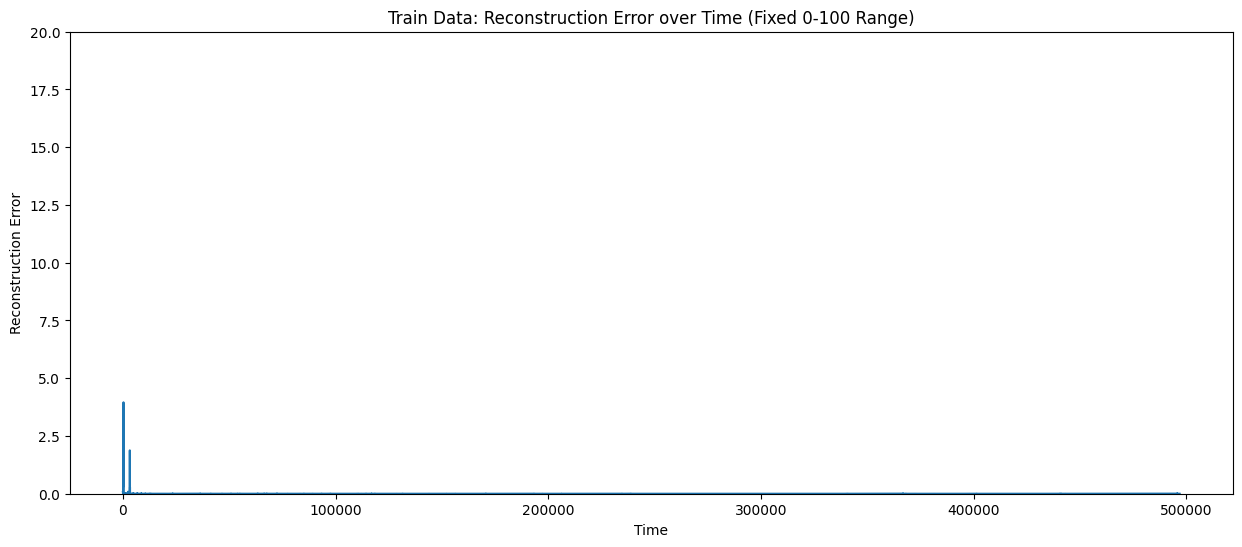

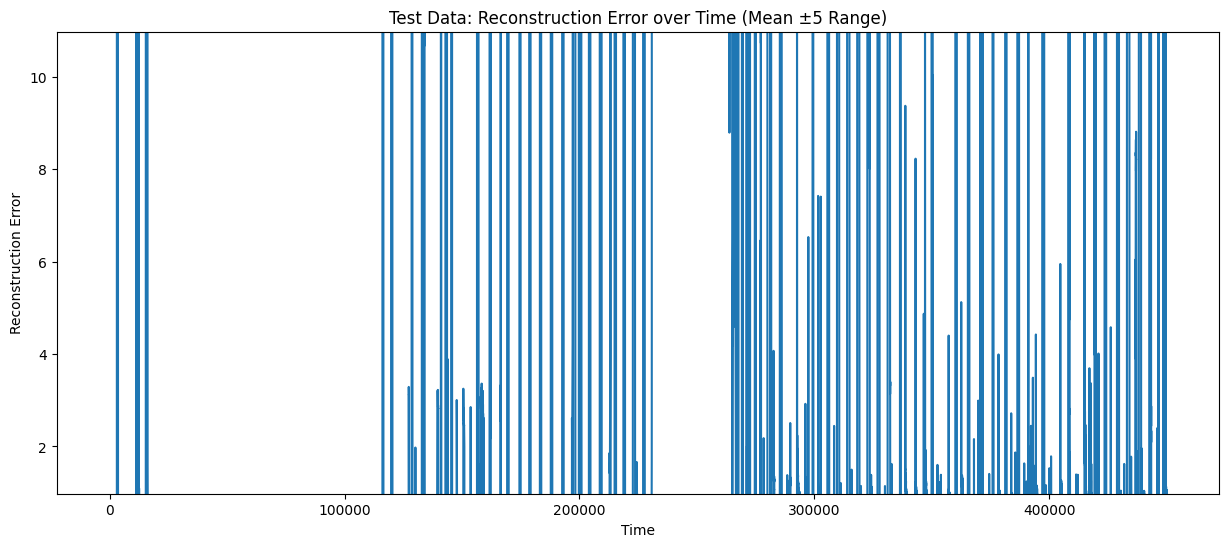

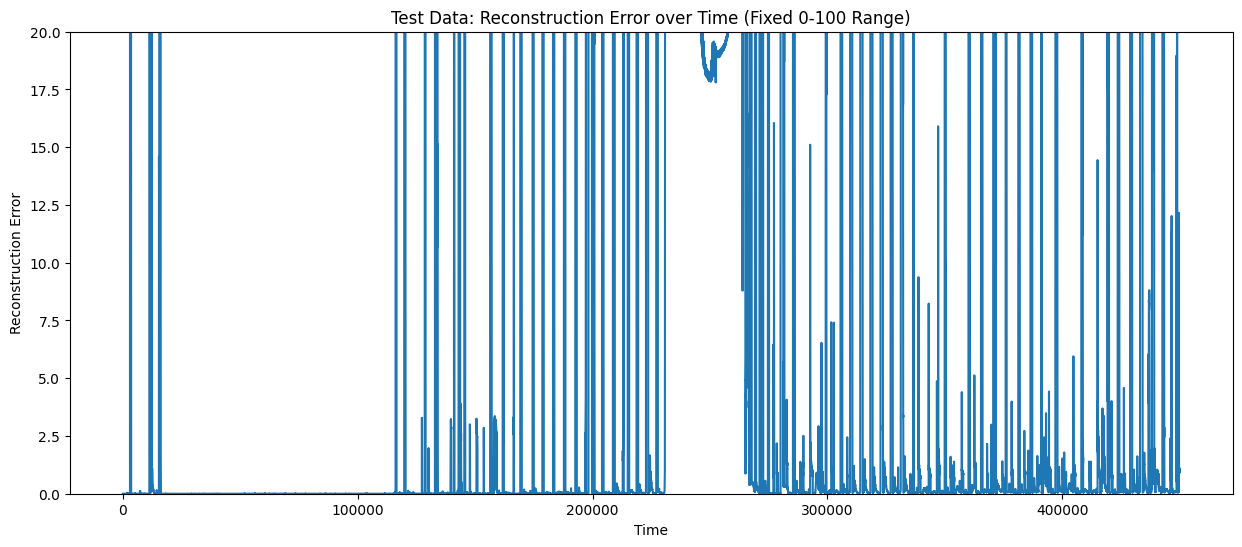

플로팅이 완료되었습니다. 총 4개의 그래프를 확인해주세요.
Train 데이터 Reconstruction Error - 평균: 0.0005, 최소값: 0.0000, 최대값: 3.9567
Test 데이터 Reconstruction Error - 평균: 5.9768, 최소값: 0.0000, 최대값: 213.2502


In [ ]:
with tf.device('/CPU:0'):
    train_pred = model.predict(train_windows_scaled, batch_size=64)
    test_pred = model.predict(test_windows_scaled, batch_size=64)

train_mse = np.mean(np.square(train_windows_scaled - train_pred), axis=(1,2))
test_mse = np.mean(np.square(test_windows_scaled - test_pred), axis=(1,2))


train_mse = np.mean(np.square(train_windows_scaled - train_pred), axis=(1,2))
test_mse = np.mean(np.square(test_windows_scaled - test_pred), axis=(1,2))

# 버전 1: y축 범위를 평균 ±5로 설정
def plot_mean_range(data, mse, title):
    plt.figure(figsize=(15, 6))
    plt.plot(data.index[window_size-1:], mse)
    plt.title(f'{title}: Reconstruction Error over Time (Mean ±5 Range)')
    plt.xlabel('Time')
    plt.ylabel('Reconstruction Error')
    mean_mse = np.mean(mse)
    plt.ylim(max(0, mean_mse - 5), mean_mse + 5)
    plt.show()

# 버전 2: y축 범위를 0에서 100으로 고정
def plot_fixed_range(data, mse, title):
    plt.figure(figsize=(15, 6))
    plt.plot(data.index[window_size-1:], mse)
    plt.title(f'{title}: Reconstruction Error over Time (Fixed 0-100 Range)')
    plt.xlabel('Time')
    plt.ylabel('Reconstruction Error')
    plt.ylim(0,20)
    plt.show()

# Train 데이터 플로팅
plot_mean_range(TRAIN_DF, train_mse, 'Train Data')
plot_fixed_range(TRAIN_DF, train_mse, 'Train Data')

# Test 데이터 플로팅
plot_mean_range(TEST_DF, test_mse, 'Test Data')
plot_fixed_range(TEST_DF, test_mse, 'Test Data')

print("플로팅이 완료되었습니다. 총 4개의 그래프를 확인해주세요.")
print(f"Train 데이터 Reconstruction Error - 평균: {np.mean(train_mse):.4f}, 최소값: {np.min(train_mse):.4f}, 최대값: {np.max(train_mse):.4f}")
print(f"Test 데이터 Reconstruction Error - 평균: {np.mean(test_mse):.4f}, 최소값: {np.min(test_mse):.4f}, 최대값: {np.max(test_mse):.4f}")

In [ ]:
import numpy as np
import pandas as pd

# 원본 TEST 데이터 로드
TEST_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/test/test.csv")

# test_mse가 이미 계산되어 있다고 가정합니다.
# 만약 test_mse가 없다면, 여기에 test_mse를 계산하는 코드를 추가해야 합니다.

# Window 크기 설정
WINDOW_SIZE = window_size

# 제출용 데이터프레임 초기화 (모든 값을 0으로 설정)
submission_df = pd.DataFrame({
    'Timestamp': TEST_DF_RAW['Timestamp'],
    'anomaly': 0
})

# 10번째 데이터부터 모델의 예측 결과 적용
# test_mse의 길이가 TEST_DF_RAW보다 WINDOW_SIZE - 1만큼 짧다고 가정합니다.
anomaly_mask = test_mse >= 20.0
submission_df.loc[WINDOW_SIZE-1:, 'anomaly'] = np.where(anomaly_mask, 1, 0)

# CSV 파일로 저장
submission_df.to_csv('sample_submission.csv', index=False)

print("제출 파일이 생성되었습니다: sample_submission.csv")

# 결과 요약
anomaly_count = np.sum(submission_df['anomaly'])
print(f"\n총 데이터 포인트 수: {len(TEST_DF_RAW)}")
print(f"이상 탐지된 데이터 포인트 수: {anomaly_count}")
print(f"정상으로 판단된 데이터 포인트 수: {len(TEST_DF_RAW) - anomaly_count}")

# 처음 몇 개의 행 출력
print("\n제출 파일의 처음 15개 행:")
print(submission_df.head(15))

# 마지막 몇 개의 행 출력
print("\n제출 파일의 마지막 5개 행:")
print(submission_df.tail())

제출 파일이 생성되었습니다: sample_submission.csv

총 데이터 포인트 수: 450000
이상 탐지된 데이터 포인트 수: 59596
정상으로 판단된 데이터 포인트 수: 390404

제출 파일의 처음 15개 행:
              Timestamp  anomaly
0   2024-08-01 11:00:00        0
1   2024-08-01 11:00:01        0
2   2024-08-01 11:00:02        0
3   2024-08-01 11:00:03        0
4   2024-08-01 11:00:04        0
5   2024-08-01 11:00:05        0
6   2024-08-01 11:00:06        0
7   2024-08-01 11:00:07        0
8   2024-08-01 11:00:08        0
9   2024-08-01 11:00:09        0
10  2024-08-01 11:00:10        0
11  2024-08-01 11:00:11        0
12  2024-08-01 11:00:12        0
13  2024-08-01 11:00:13        0
14  2024-08-01 11:00:14        0

제출 파일의 마지막 5개 행:
                  Timestamp  anomaly
449995  2024-08-06 15:59:55        0
449996  2024-08-06 15:59:56        0
449997  2024-08-06 15:59:57        0
449998  2024-08-06 15:59:58        0
449999  2024-08-06 15:59:59        0


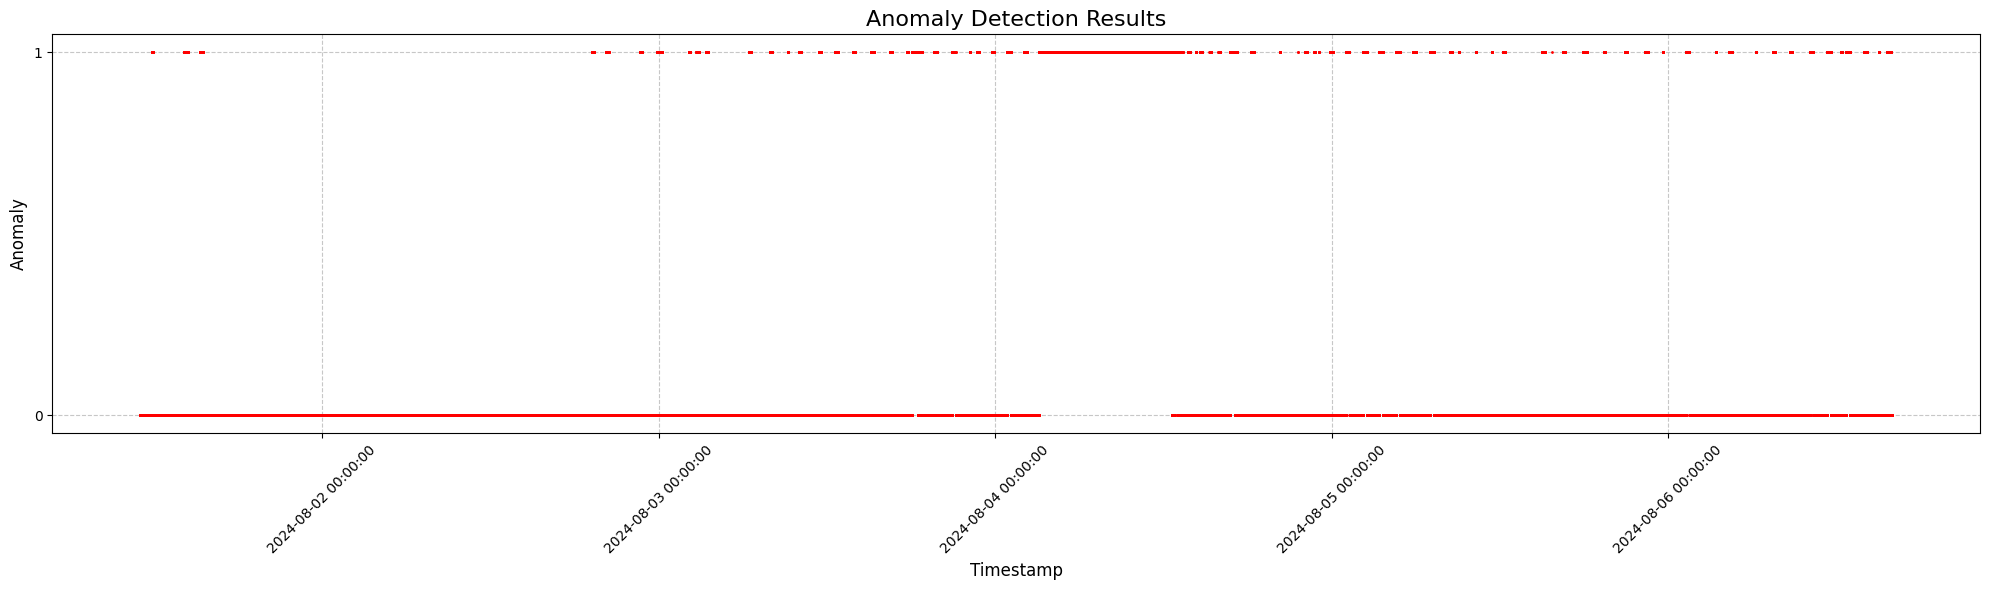

그래프가 'anomaly_detection_results.png' 파일로 저장되었습니다.

총 데이터 포인트 수: 450000
이상 탐지된 데이터 포인트 수: 75598
정상으로 판단된 데이터 포인트 수: 374402
이상 탐지 비율: 16.80%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# 제출 파일 로드 (이미 생성되어 있다고 가정)
submission_df = pd.read_csv('sample_submission.csv')

# Timestamp를 datetime으로 변환
submission_df['Timestamp'] = pd.to_datetime(submission_df['Timestamp'])

# 그래프 설정
plt.figure(figsize=(20, 6))
plt.plot(submission_df['Timestamp'], submission_df['anomaly'], 'r.', markersize=2)

# x축 설정
plt.xlabel('Timestamp', fontsize=12)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M:%S'))

# y축 설정
plt.ylabel('Anomaly', fontsize=12)
plt.yticks([0, 1])

# 제목 설정
plt.title('Anomaly Detection Results', fontsize=16)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('anomaly_detection_results.png', dpi=300, bbox_inches='tight')

# 그래프 표시
plt.show()

print("그래프가 'anomaly_detection_results.png' 파일로 저장되었습니다.")

# 통계 정보 출력
anomaly_count = np.sum(submission_df['anomaly'])
total_count = len(submission_df)
print(f"\n총 데이터 포인트 수: {total_count}")
print(f"이상 탐지된 데이터 포인트 수: {anomaly_count}")
print(f"정상으로 판단된 데이터 포인트 수: {total_count - anomaly_count}")
print(f"이상 탐지 비율: {anomaly_count/total_count*100:.2f}%")